In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Y')

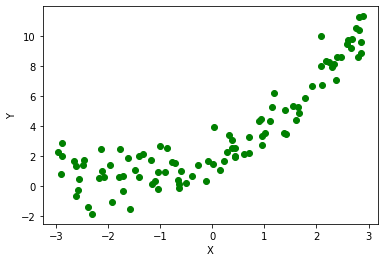

In [2]:
# numpy.random.rand()` in Python is a function from the NumPy library that generates an array of specified shapes and fills it with random values uniformly distributed between 0 and 1. 
# It is commonly used for creating random arrays

x= 6*np.random.rand(100,1)-3   # (-3 is used to create some outliers)
y=0.5* x**2 + 1.5*x + 2+np.random.randn(100,1)

plt.scatter(x,y,color='g')
plt.xlabel('X')
plt.ylabel('Y')

In [3]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [4]:
## Let's implement Simple LR to check how model is performing on non linear data points

from sklearn.linear_model import LinearRegression
regression_1=LinearRegression()


In [5]:
x_train.shape

(80, 1)

In [6]:
y_train.shape

(80, 1)

In [7]:
regression_1.fit(x_train,y_train)

LinearRegression()

In [8]:
y_pred=regression_1.predict(x_test)

In [9]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)

In [10]:
from sklearn.metrics import r2_score
score_1 =r2_score(y_test,y_pred)
print(score_1)    # Accuracy is  very less for test dataset

0.7084487615023629


Text(0, 0.5, 'Y')

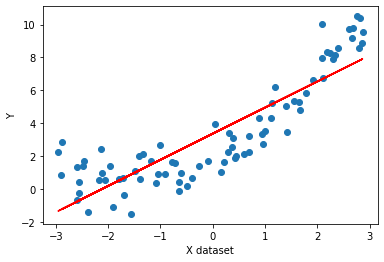

In [11]:
## Let's visualize this model corresponding to train dataset

plt.plot(x_train,regression_1.predict(x_train),color='r')
plt.scatter(x_train,y_train)
plt.xlabel("X dataset")
plt.ylabel("Y")

### Apply polynomial regression

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2,include_bias=True)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.transform(x_test)

In [13]:
x_train_poly
x_train

array([[-1.4812353 ],
       [ 1.66875856],
       [-2.55895898],
       [ 0.15690157],
       [-0.77005758],
       [ 2.09637949],
       [ 0.8925141 ],
       [-1.7200179 ],
       [ 2.29719129],
       [ 1.7746188 ],
       [ 0.43698128],
       [ 2.86466696],
       [ 2.8145174 ],
       [-1.00512051],
       [ 2.67077734],
       [-0.26716908],
       [ 0.95894257],
       [-0.72160072],
       [-0.91378411],
       [ 0.38931939],
       [-0.49493114],
       [-0.60643537],
       [-1.57045284],
       [ 1.00421458],
       [-2.95580726],
       [ 2.18431831],
       [ 1.91921445],
       [-1.33633279],
       [-2.60492201],
       [ 1.10552817],
       [ 1.40178258],
       [ 0.37458151],
       [ 0.04314182],
       [ 2.23523306],
       [ 2.33244151],
       [ 1.19071237],
       [-1.41180144],
       [-2.12751569],
       [ 0.6971475 ],
       [ 0.94899479],
       [-2.48516172],
       [-0.64322315],
       [-1.9163177 ],
       [-1.70494085],
       [ 2.61345982],
       [ 2

In [14]:
x_test_poly

array([[ 1.00000000e+00, -6.42907391e-01,  4.13329913e-01],
       [ 1.00000000e+00, -1.77421691e+00,  3.14784563e+00],
       [ 1.00000000e+00, -1.25817159e-01,  1.58299574e-02],
       [ 1.00000000e+00, -1.15298300e+00,  1.32936979e+00],
       [ 1.00000000e+00, -2.87897682e+00,  8.28850751e+00],
       [ 1.00000000e+00,  2.57982421e+00,  6.65549297e+00],
       [ 1.00000000e+00,  1.38677264e+00,  1.92313836e+00],
       [ 1.00000000e+00, -8.64661519e-01,  7.47639543e-01],
       [ 1.00000000e+00,  2.88525346e+00,  8.32468755e+00],
       [ 1.00000000e+00,  4.42830934e-01,  1.96099236e-01],
       [ 1.00000000e+00, -1.03192390e+00,  1.06486693e+00],
       [ 1.00000000e+00, -1.60611906e+00,  2.57961843e+00],
       [ 1.00000000e+00,  1.61237975e+00,  2.59976844e+00],
       [ 1.00000000e+00,  2.37832580e+00,  5.65643363e+00],
       [ 1.00000000e+00,  1.50837862e-02,  2.27520606e-04],
       [ 1.00000000e+00, -2.29703839e+00,  5.27638535e+00],
       [ 1.00000000e+00,  2.48156185e+00

In [15]:
## Check the score based on new train and test values

from sklearn.metrics import r2_score
regression=LinearRegression()
regression.fit(x_train_poly,y_train)
y_pred=regression.predict(x_test_poly)
score_poly=r2_score(y_test,y_pred)
print(score_poly)   # Accuracy is very good

0.9036952483411822


In [16]:
print(regression.coef_)

[[0.         1.56528436 0.47207091]]


In [17]:
print(regression.intercept_)

[1.87434303]


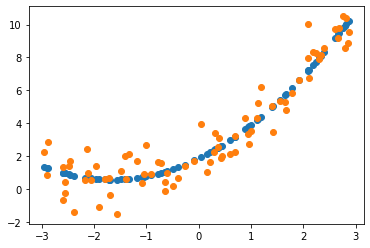

In [18]:
plt.scatter(x_train,regression.predict(x_train_poly))   # Going to give you best fit line
plt.scatter(x_train,y_train)

## Let's check the accuracy when the degree is 3

In [19]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3,include_bias=True)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.transform(x_test)

In [20]:
## Check the score based on new train and test values

from sklearn.metrics import r2_score
regression=LinearRegression()
regression.fit(x_train_poly,y_train)
y_pred=regression.predict(x_test_poly)
score_poly=r2_score(y_test,y_pred)
print(score_poly)   # Accuracy has decreased this time for degree 3 and was good but degree 2

0.9024542959079999


In [21]:
### Check the model for new data

x_new=np.linspace(-3,3,200).reshape(200,1)
x_new_poly=poly.transform(x_new)
x_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00,
        -2.70000000e+01],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00,
        -2.61940839e+01],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00,
        -2.54043665e+01],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00,
        -2.46306834e+01],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00,
        -2.38728702e+01],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00,
        -2.31307624e+01],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00,
        -2.24041955e+01],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00,
        -2.16930052e+01],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00,
        -2.09970269e+01],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00,
        -2.03160961e+01],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00,
        -1.96500486e+01],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00,
      

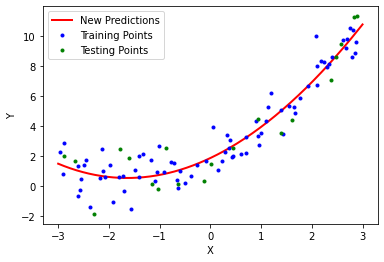

In [22]:
y_new=regression.predict(x_new_poly)
plt.plot(x_new,y_new,'r-',linewidth=2,label='New Predictions')
plt.plot(x_train,y_train,'b.',linewidth=2,label='Training Points')
plt.plot(x_test,y_test,'g.',linewidth=2,label='Testing Points')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

### Pipeline concept in PPolynomial regression

In [24]:
from sklearn.pipeline import Pipeline

In [50]:
def poly_regression(degree):
    x_new=np.linspace(-3,3,200).reshape(200,1)
    
    from sklearn.linear_model import LinearRegression
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
                              ("poly_features",poly_features),
                              ("lin_reg",lin_reg)
                             
    ])
    poly_regression.fit(x_train,y_train)   # Doing polynomial feature and doing linear regression
    y_pred_new=poly_regression.predict(x_new)
    
    # Plotting prediction line
    plt.plot(x_new,y_pred_new,"r",label="Degree " + str(degree),linewidth=2)
    plt.plot(x_train,y_train,"b.",linewidth=3)
    plt.plot(x_test,y_test,"g.",linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.xlabel("Y")
    plt.axis([-4,4,0,10])
    plt.show()

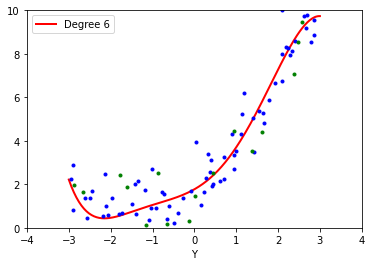

In [52]:
poly_regression(6)